# Clustering 

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities

In this assignment, our objective is to Categorise/Cluster the countries using some socio-economic and health factors that determine the overall development of the country, then identify the under developed countries  which the CEO of NGO needs to focus on the most to provide aid.

### Steps  for Analysis:-</br>
    1.Data Understanding and Cleaning
    2.Data Preparation: Outliers Removal, Scaling 
    3.Principle Component Analysis (PCA) 
    4.Clustering: k-means & Hierarchical Clustering with different k
    5.Visualization
    5.Inferences & Conclusions

In [1]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

#### Importing all libraries

In [3]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler

### Data Understanding

In [4]:
#read dataset
df_help=pd.read_csv("C:\\Users\\Prashant\\Desktop\\FactualAI-Document\\Course_Content\\Clustering\\Case_Study\Country-data.csv")
df_help.head()  

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [34]:
#about Dataset
df_help.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [35]:
#checking shape,columns,etc of dataset
print(df_help.shape)
print(df_help.columns)
print(df_help.info())

(167, 10)
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [36]:
#Check null
print(df_help.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


### NO Null Values !!! We are good to go !!!

### Converting exports,imports and health spending percentages to absolute values.

In [5]:

df_help['exports'] = df_help['exports']*df_help['gdpp']/100
df_help['imports'] = df_help['imports']*df_help['gdpp']/100
df_help['health'] = df_help['health']*df_help['gdpp']/100
df_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [38]:
help_df_new=df_help
help_df_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Data Preperation

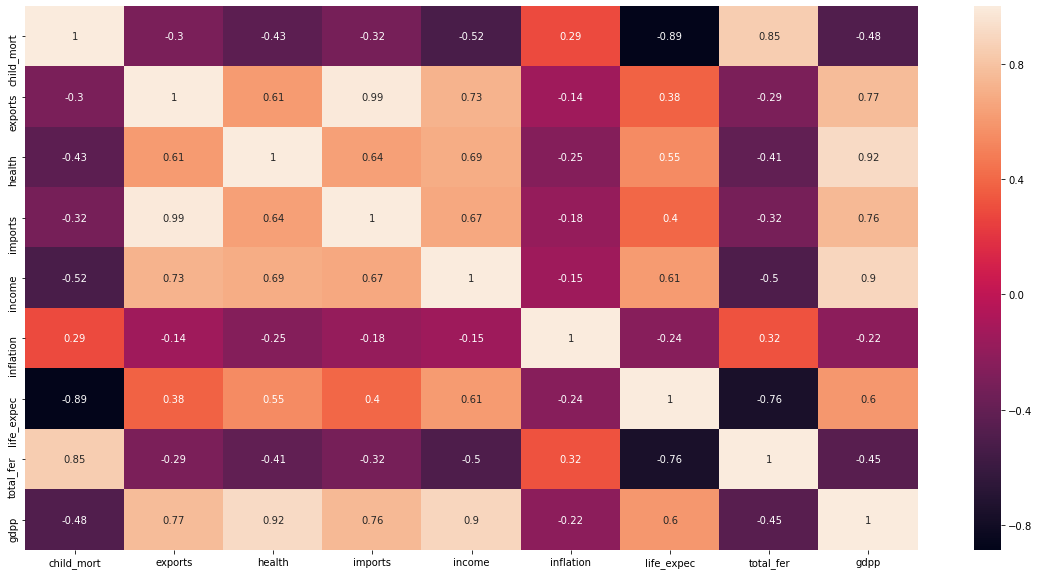

In [39]:

#first let's plot the correlation matrix and check if the features are correlated

plt.figure(figsize = (20,10))        
sns.heatmap(df_help.corr(),annot = True)

### Feature  Income is highly positively correlated with  exports, gdpp, health, imports & life_expec 

#####  For PCA, dataset would only contain the numeric columns. Hence let's drop the country column.

In [40]:

ff=df_help["country"]
df1_help=df_help.drop(['country'],axis=1)
df1_help.head() 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Checking Outliers

In [41]:
# Checking for outliers in the continuous variables
#num_ngo = df1_help[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

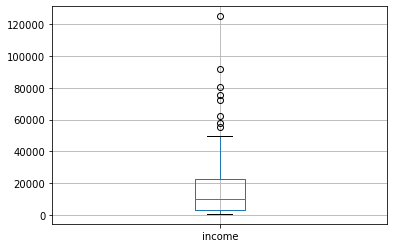

In [42]:
df1_help.boxplot('income')

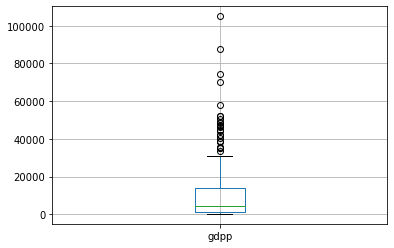

In [43]:
df1_help.boxplot('gdpp')

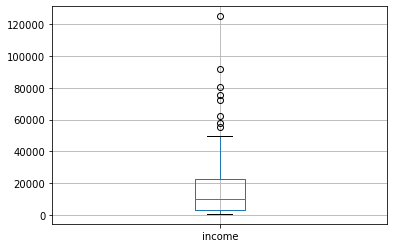

In [44]:
df1_help.boxplot('income')

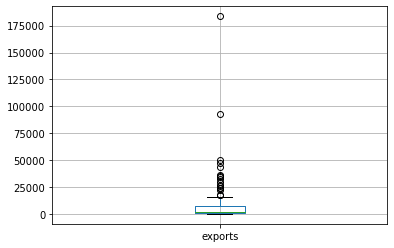

In [45]:
df1_help.boxplot('exports')

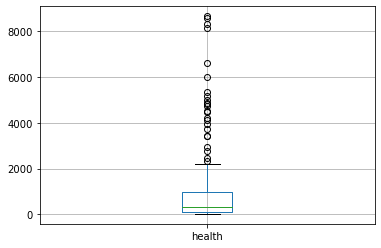

In [46]:
df1_help.boxplot('health')

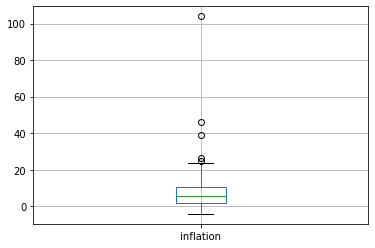

In [47]:
df1_help.boxplot('inflation')

### Developed Countries have very High income & gdpp, Low inflation, Low child_mort & High spenditure on health. 

### Thus would not be the choice for Help NGO to provide aid. Thus the outliers with very high income values could be removed from the dataset as its not going to affect the final inferences as objective here is to identify under developed countries which need financial aid whenever required and Help NGO can support them. 

### Removing top 5% developed countries with respect to very high income.

### Removing country with very high inflation value (Nigeria with inflation rate as 140)  as when clustered its forming a seperate cluster with single country which does not make any sense.

In [48]:
#Removing Outliers on income 

Q = df1_help.income.quantile(0.95)


df1_help= df1_help[~(df1_help.income > Q)]


In [49]:
df1_help.shape

(158, 9)

In [50]:
# Removing Outliers on inflation

df1_help= df1_help[~(df1_help.inflation > 46)]


In [51]:
df1_help.shape

(157, 9)

In [52]:
#Removing Outliers of income column (with Country Column present in dataset)

Q = help_df_new.income.quantile(0.95)


help_df_new= help_df_new[~(help_df_new.income > Q)]
help_df_new.shape

(158, 10)

In [53]:
#Removing Outliers of inflation column (with Country Column present in dataset)

help_df_new= help_df_new[~(help_df_new.inflation > 46)]
help_df_new.shape

(157, 10)

In [54]:
df_country= help_df_new['country']

In [55]:
df_country= df_country.reset_index(drop=True)

df_country.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [56]:
#print(help_df_new.isnull().sum())

### Checking Descriptive Statistics of all Numeric Columns

In [57]:

# Checking values at 25%,50%,75%,90%,95% and 99%

df1_help.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,39.500637,4793.872978,867.630026,4692.063580,13940.210191,7.242834,70.096178,2.995541,10326.012739
std,40.209825,7742.478871,1418.229105,6995.792009,12944.981404,7.574587,8.844779,1.516919,13723.344499
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.230000,231.000000
25%,10.000000,425.226000,67.858000,562.020000,3280.000000,1.850000,64.600000,1.800000,1310.000000
50%,20.700000,1675.870000,278.481000,1831.950000,9860.000000,5.140000,72.100000,2.520000,4500.000000
75%,62.200000,5656.000000,827.970000,6052.000000,20100.000000,10.100000,76.400000,4.080000,12100.000000
90%,100.220000,12835.260000,3118.748000,12083.120000,36200.000000,16.600000,80.300000,5.322000,31960.000000
95%,116.000000,18778.440000,4574.856000,17796.540000,41160.000000,20.820000,81.320000,5.926000,44840.000000
99%,154.400000,34931.136000,5633.180000,32790.032000,45444.000000,32.088000,82.000000,6.567600,51988.000000


### As the values are gradually increasing thus there are no outliers in dataset. Thus we good to go with this dataset.

In [58]:
# Checking the percentage of missing values

#round(100*(df1_help.isnull().sum()/len(df1_help.index)), 2)

### Checking Correlation 

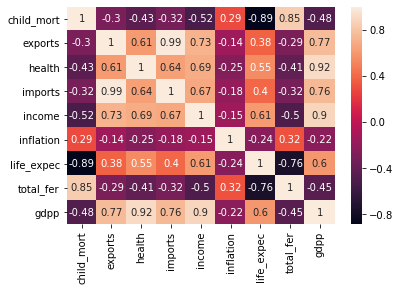

In [59]:
#checking correlation

sns.heatmap(df_help.corr(),annot = True)

### Features seem to have High Correlations !!! Multi Collinearity is Present in Data !!

### Checking the scatter pairplots between different numeric features 

### Its evident that countries having high income have high gdpp, low inflation, high exports, low child_mort, high life_expec  and high spenditure on health. Thus these features are highly correlated.

### Feature Standardisation

In [60]:
# Normalizing numeric features

df = df_help[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [61]:
# Normalizing numeric features

normalized_df=(df1_help-df1_help.mean())/(df1_help.std())

normalized_df.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.260870,-0.612023,-0.582214,-0.635206,-0.952509,0.290071,-1.571117,1.861971,-0.712145
1,-0.569528,-0.471254,-0.422876,-0.386564,-0.309789,-0.363430,0.701411,-0.887023,-0.454409
2,-0.303424,-0.397965,-0.480633,-0.470515,-0.080356,1.169327,0.724023,-0.069576,-0.427448
3,1.977113,-0.335123,-0.540833,-0.454229,-0.621106,2.001055,-1.130178,2.086109,-0.495215
4,-0.726207,0.097789,-0.093053,0.356462,0.398594,-0.766092,0.757941,-0.570592,0.136555


In [62]:
normalized_df.shape

(157, 9)

In [63]:

X=normalized_df

<Figure size 288x288 with 0 Axes>

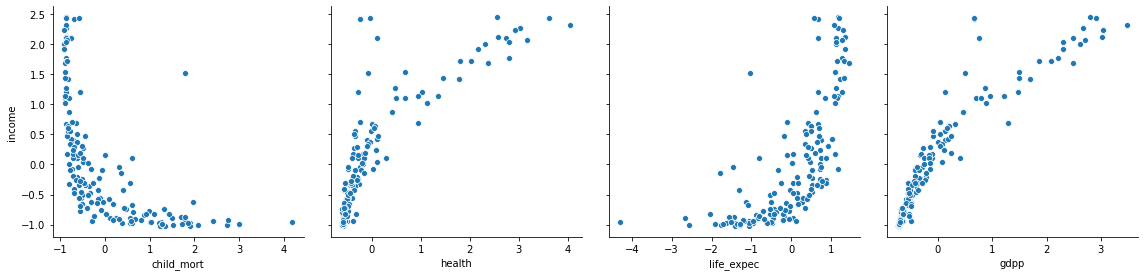

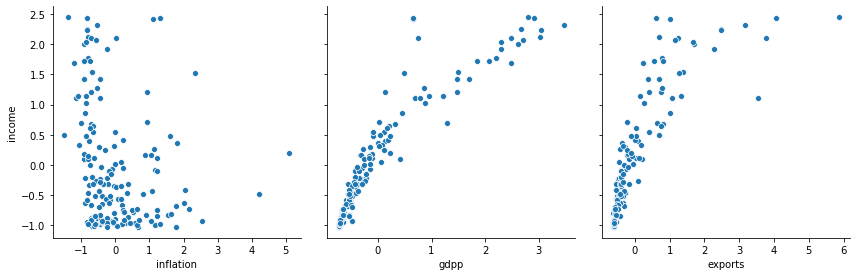

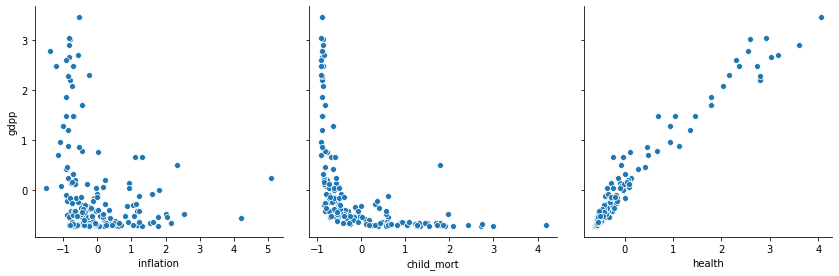

In [64]:
#  Making pairplot for all numeric values that we need

plt.figure(figsize=(4,4))
sns.pairplot(X, x_vars=['child_mort','health','life_expec', 'gdpp'], y_vars='income',height=4, aspect=1,kind='scatter')

sns.pairplot(X, x_vars=['inflation','gdpp','exports'], y_vars='income',height=4, aspect=1,kind='scatter')

sns.pairplot(X, x_vars=['inflation','child_mort','health'], y_vars='gdpp',height=4, aspect=1,kind='scatter')

plt.show()

## PCA on Scaled Dataset 

### PCA derives the feature's  Principle Components which are uncorrelated, orthogonal  and cover maximum variance of data without actually loosing any data.

In [65]:
#Improting the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [66]:
#Doing the PCA on dataset

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Plotting  Principal Components

In [67]:
pca.components_

array([[-3.03595000e-01,  3.57248273e-01,  3.66327518e-01,
         3.65603757e-01,  3.83197718e-01, -1.64918851e-01,
         3.29683259e-01, -2.88937537e-01,  3.82265772e-01],
       [ 5.20552779e-01,  3.22225318e-01,  2.61603304e-01,
         2.90019631e-01,  8.80922029e-02,  8.15362030e-03,
        -4.00748534e-01,  5.03356102e-01,  2.25509431e-01],
       [-8.05079192e-02,  6.94970089e-02,  8.10487237e-03,
         6.23816403e-04,  1.67732269e-01,  9.72035392e-01,
         1.01286170e-01,  4.31887465e-02,  5.92578211e-02],
       [-7.36569894e-02,  5.15743693e-01, -4.73316465e-01,
         4.95836194e-01, -1.64605090e-01,  3.90865984e-02,
        -1.55380074e-01, -2.08670138e-01, -4.02979270e-01],
       [ 2.24360753e-01, -1.02377145e-01,  1.06014535e-01,
        -1.07366147e-01,  1.76520431e-01,  8.20009640e-02,
        -5.96497115e-01, -7.14971680e-01,  1.07413544e-01],
       [ 1.15838846e-01, -2.67094997e-03, -5.06085658e-01,
        -1.59897052e-01,  8.14572832e-01, -1.320200

#### Checking the PC Variances Ratio

In [68]:
#Let's check the variance ratios

pca.explained_variance_ratio_

array([0.65504522, 0.15893564, 0.09822415, 0.03683439, 0.02599365,
       0.01352207, 0.00952162, 0.00109122, 0.00083204])

### Its evident that PC1 is covering 65.5% of variance(information) ,  PC2 is explaining 16% of variance in data , 10% is being covered by PC3 & about 3.7% by PC4. 

#### Converting to Dataframe having features with  PC values as different columns 

In [69]:
pcs_df = pd.DataFrame({"Features":df1_help.columns,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2], 'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8]})
pcs_df

,Features,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,child_mort,-0.303595,0.520553,-0.080508,-0.073657,0.224361,0.115839,0.748986,0.010547,-0.010052
1,exports,0.357248,0.322225,0.069497,0.515744,-0.102377,-0.002671,0.023626,-0.452682,0.530807
2,health,0.366328,0.261603,0.008105,-0.473316,0.106015,-0.506086,-0.030317,-0.453994,-0.314456
3,imports,0.365604,0.290020,0.000624,0.495836,-0.107366,-0.159897,0.038682,0.463948,-0.531536
4,income,0.383198,0.088092,0.167732,-0.164605,0.176520,0.814573,-0.084292,-0.148068,-0.257785
5,inflation,-0.164919,0.008154,0.972035,0.039087,0.082001,-0.132020,0.030984,0.027623,-0.021868
6,life_expec,0.329683,-0.400749,0.101286,-0.155380,-0.596497,0.025538,0.582777,-0.012830,0.007298
7,total_fer,-0.288938,0.503356,0.043189,-0.208670,-0.714972,0.141982,-0.291128,-0.002567,-0.040418
8,gdpp,0.382266,0.225509,0.059258,-0.402979,0.107414,-0.055815,-0.059978,0.592243,0.517796


Let's plot  to get a better idea about which variables are well explained for components.

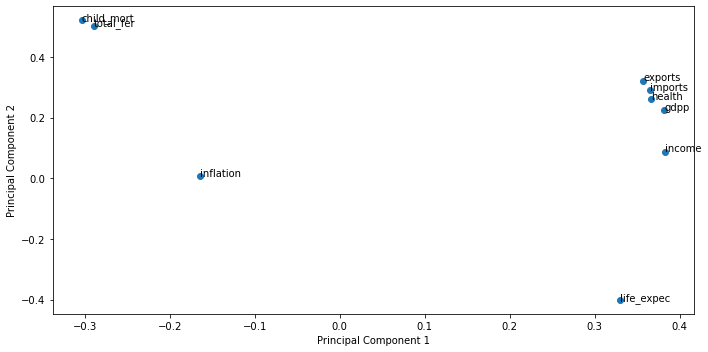

In [70]:
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Features):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### The above figure shows the Loadings: how the original variables are related to PCs. For features income, gdpp,health, life_expec, exports, imports PC1 is high & for features like inflation, child_mort, total_fer PC2 is higher.

### Scree plot to decide on number of PCs 

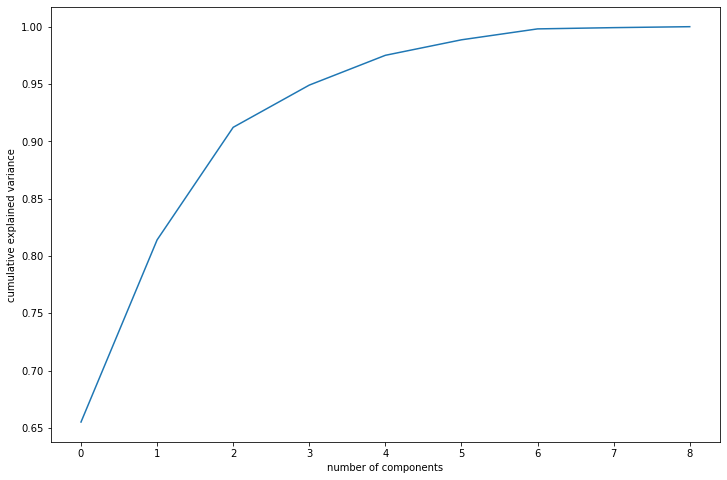

In [71]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Clearly over 95% of the data is properly explained by the first 4 principal components. so choosing the number of principle components as 4

In [72]:
#from sklearn.decomposition import IncrementalPCA

pca_final = PCA(n_components=4)

#### Transforming Dataset to first 4  PCs 

In [73]:
df_pca = pca_final.fit_transform(X)
df_pca.shape

(157, 4)

In [74]:
#take the transpose of the PC matrix so that we can create the new matrix

pc = np.transpose(df_pca)
pc

array([[-2.78798255e+00, -3.66305582e-02, -5.26378839e-01,
        -2.81683199e+00,  1.09767314e+00,  6.42750042e-02,
        -4.40849535e-01,  4.53286077e+00,  5.89726088e+00,
        -4.29067272e-01,  2.44395605e+00,  2.49084817e+00,
        -1.21074699e+00,  1.35541770e+00,  7.41015858e-02,
         6.55471720e+00, -3.39234463e-01, -2.44574813e+00,
        -7.92398797e-01, -1.14757960e+00,  2.88575659e-01,
        -9.83173740e-01,  2.39443313e-01,  4.85444672e-01,
        -2.87874628e+00, -2.95158467e+00, -1.31289395e+00,
        -2.50711377e+00,  4.95108210e+00, -5.37743235e-01,
        -3.31578170e+00, -3.26974827e+00,  9.86711384e-01,
        -1.90872744e-01, -1.33723569e-02, -2.07690568e+00,
        -3.35907442e+00, -2.16843718e+00,  5.53715296e-01,
        -2.65137202e+00,  1.25696974e+00,  3.63507249e+00,
         2.67564493e+00,  6.82798407e+00, -3.49939970e-01,
        -3.34460796e-01, -9.39181390e-01, -3.87415505e-01,
        -2.04542969e-01, -2.15897744e+00,  1.79245010e+0

#### Creating correlation matrix of the principal components - we expect very low  to zero correlation among them.

In [75]:
#creating correlation matrix for the principal components

corrmat = np.corrcoef(df_pca.transpose())
pd.DataFrame(corrmat)

,0,1,2,3
0,1.000000e+00,-1.892078e-17,-8.845150e-17,-7.267327e-17
1,-1.892078e-17,1.000000e+00,-3.507076e-17,2.979621e-17
2,-8.845150e-17,-3.507076e-17,1.000000e+00,1.581222e-16
3,-7.267327e-17,2.979621e-17,1.581222e-16,1.000000e+00


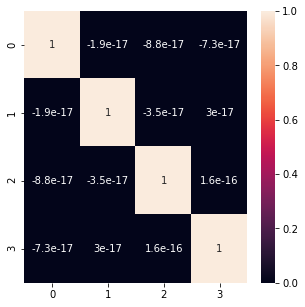

In [76]:
#plotting the correlation matrix

%matplotlib inline
plt.figure(figsize = (5,5))
sns.heatmap(corrmat,annot = True)

In [77]:
# 1s -> 0s in diagonals

corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 1.581222382384818e-16 , min corr:  -8.845150155344934e-17


#### Checking PCs  for Different Countries

In [78]:
#Let's create the newer matrix according to the given principal components

rownames = list(help_df_new['country'])
pcs_df2 = pd.DataFrame({'country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})
pcs_df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.787983,1.447327,-0.147883,-0.137217
1,Albania,-0.036631,-1.531361,-0.389990,0.103400
2,Algeria,-0.526379,-0.967487,1.160729,-0.055501
3,Angola,-2.816832,2.000886,1.600066,-0.167392
4,Antigua and Barbuda,1.097673,-0.798774,-0.552865,0.175428


In [79]:
pcs_df2.shape

(157, 5)

#### Checking the Loadings : How PC1 & PC2 related with different countries

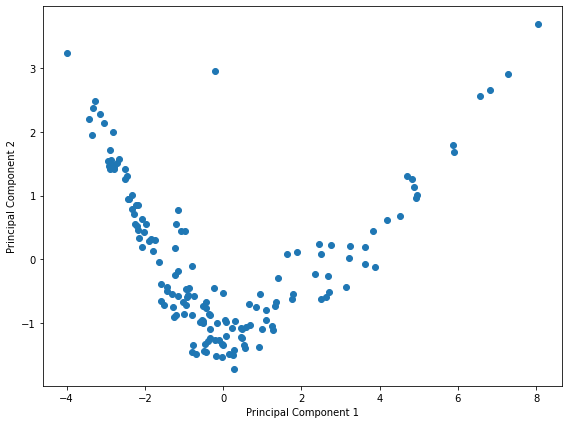

In [80]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(df_pca[:,0], df_pca[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

## Clustering

#### Hopkins Statistics

 Let's proceed to calculating the Hopkins statistic to ensure that the data is good for clustering.

In [81]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [82]:
#Let's check the Hopkins measure

df1=pd.DataFrame(df_pca)
hopkins(df1)

0.8531844341964137

####  Hopkins score(> .75)  is good. Hence the dataset is suitable for clustering.


#### Sum of Squared Distances

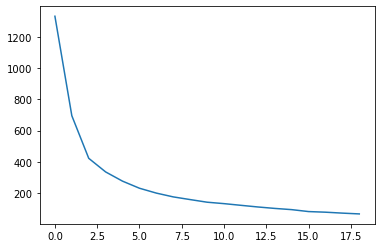

In [83]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,20)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

### As per Elbow curve, optimum number of clusters can be chosen as 4 

### Silhouette Analysis

In [84]:
#Let's check the silhouette score first to identify the optimum number of clusters

from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

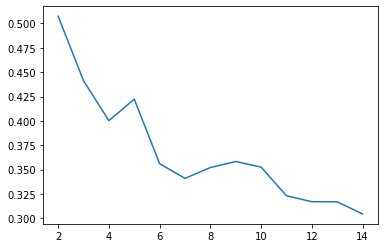

In [85]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### As per Silhouette Statistic also, number of clusters can be chosen as 4 or 5 
### k=4 would be an optimum choice as per both Elbow Curve & Silhouette Score.

## K-means Clustering with k=4

In [86]:
model_clus = KMeans(n_clusters = 4, max_iter=50, init='k-means++', n_init= 10, tol=0.0001, random_state=50, algorithm='auto')
model_clus.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [87]:
len(model_clus.labels_)

157

In [88]:
df_pca_cluster=pd.concat([df1,pd.Series(model_clus.labels_)], axis=1)
df_pca_cluster.columns =['PC1','PC2','PC3','PC4','Cluster_Id']
df_pca_cluster.head()

,PC1,PC2,PC3,PC4,Cluster_Id
0,-2.787983,1.447327,-0.147883,-0.137217,3
1,-0.036631,-1.531361,-0.389990,0.103400,0
2,-0.526379,-0.967487,1.160729,-0.055501,0
3,-2.816832,2.000886,1.600066,-0.167392,3
4,1.097673,-0.798774,-0.552865,0.175428,0


In [89]:
df_pca_cluster['Cluster_Id'].value_counts()

0    76
3    44
2    26
1    11
Name: Cluster_Id, dtype: int64

In [90]:
#adding country column

df_pca_cluster=pd.concat([df_pca_cluster,pd.Series(df_country)],axis=1) 
df_pca_cluster.head()

,PC1,PC2,PC3,PC4,Cluster_Id,country
0,-2.787983,1.447327,-0.147883,-0.137217,3,Afghanistan
1,-0.036631,-1.531361,-0.389990,0.103400,0,Albania
2,-0.526379,-0.967487,1.160729,-0.055501,0,Algeria
3,-2.816832,2.000886,1.600066,-0.167392,3,Angola
4,1.097673,-0.798774,-0.552865,0.175428,0,Antigua and Barbuda


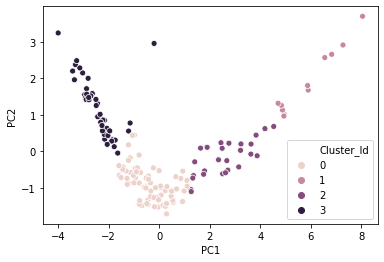

In [91]:
sns.scatterplot(x= 'PC1', y='PC2', hue='Cluster_Id', legend= 'full', data= df_pca_cluster)

In [92]:
df_pca_cluster.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Cluster_Id', 'country'], dtype='object')

In [93]:
df_pca_cluster.shape

(157, 6)

In [94]:
final_df=df_pca_cluster.merge(help_df_new,how='left',left_on='country',right_on='country')
final_df.head()

,PC1,PC2,PC3,PC4,Cluster_Id,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.787983,1.447327,-0.147883,-0.137217,3,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,-0.036631,-1.531361,-0.389990,0.103400,0,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,-0.526379,-0.967487,1.160729,-0.055501,0,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,-2.816832,2.000886,1.600066,-0.167392,3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,1.097673,-0.798774,-0.552865,0.175428,0,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [95]:
final_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Cluster_Id', 'country', 'child_mort',
       'exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp'],
      dtype='object')

In [96]:
final_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Cluster_Id', 'country', 'child_mort',
       'exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp'],
      dtype='object')

In [97]:
# Analysis of clusters formed

km_clusters_exports = pd.DataFrame(final_df.groupby(["Cluster_Id"]).exports.mean())
km_clusters_child_mort = pd.DataFrame(final_df.groupby(["Cluster_Id"]).child_mort.mean())
km_clusters_health = pd.DataFrame(final_df.groupby(["Cluster_Id"]).health.mean())
km_clusters_imports = pd.DataFrame(final_df.groupby(["Cluster_Id"]).imports.mean())
km_clusters_income = pd.DataFrame(final_df.groupby(["Cluster_Id"]).income.mean())
km_clusters_inflation = pd.DataFrame(final_df.groupby(["Cluster_Id"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(final_df.groupby(["Cluster_Id"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(final_df.groupby(["Cluster_Id"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(final_df.groupby(["Cluster_Id"]).gdpp.mean())
dfa= pd.concat([pd.Series([0,1,2,3]), km_clusters_exports, km_clusters_child_mort, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
dfa.columns = ["ClusterID", "exports_mean", "child_mort_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
dfa.head()

,ClusterID,exports_mean,child_mort_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,2065.614191,24.460526,343.545953,2266.923567,10691.973684,8.237987,72.130263,2.375263,5296.078947
1,1,27430.027273,4.254545,4736.719091,24937.390909,40945.454545,1.624636,80.572727,1.767273,45345.454545
2,2,9959.200000,6.600000,2083.366538,9905.819231,30065.384615,2.203923,78.173077,1.791923,24950.000000
3,3,795.042705,93.731818,87.204130,738.754341,3270.977273,9.906023,59.190909,5.085227,1617.772727


### Binning on Original Dataset 

In [98]:
# Binning 

fin= df_help[df_help['income'] < 10454]

fin= fin[fin['child_mort'] > 24]


fin= fin[fin['health'] < 328]

In [99]:
fin.head(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.140,70.4,2.33,758
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
18,Bhutan,42.7,926.5000,113.3600,1541.260,6420,5.990,72.1,2.38,2180
19,Bolivia,46.6,815.7600,95.8320,679.140,5410,8.780,71.6,3.20,1980
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
27,Cambodia,44.4,425.2260,44.6448,467.670,2520,3.120,66.1,2.88,786
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310


#### Binning on Original Dataset based on the cluster's mean value for features where the variation is maximum from one cluster to other cluster based on objective of analysis. As we want to choose the countries which have very low income,high child_mort  & very low spenditure on health. This justifies the list of under developed countries which are dire need of help.

### Plotting the Barplots for different Cluster_Ids & original feature's Mean value

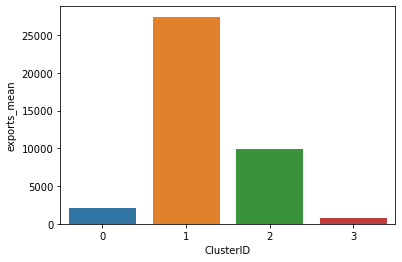

In [100]:
sns.barplot(x=dfa.ClusterID, y=dfa.exports_mean)

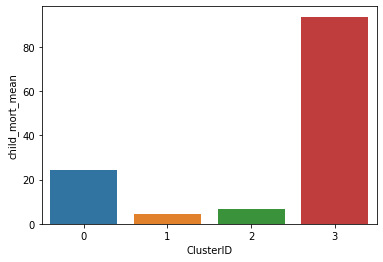

In [101]:
sns.barplot(x=dfa.ClusterID, y=dfa.child_mort_mean)

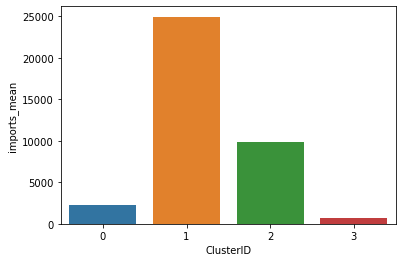

In [102]:
sns.barplot(x=dfa.ClusterID, y=dfa.imports_mean)

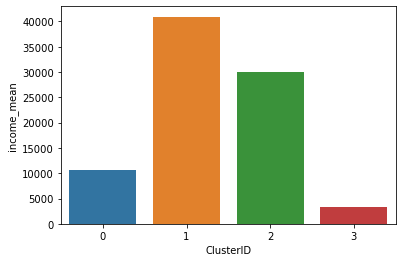

In [103]:
sns.barplot(x=dfa.ClusterID, y=dfa.income_mean)

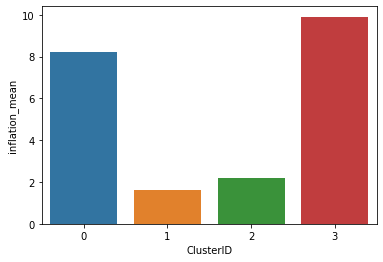

In [104]:
sns.barplot(x=dfa.ClusterID, y=dfa.inflation_mean)

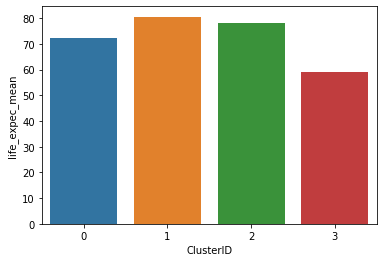

In [105]:
sns.barplot(x=dfa.ClusterID, y=dfa.life_expec_mean)

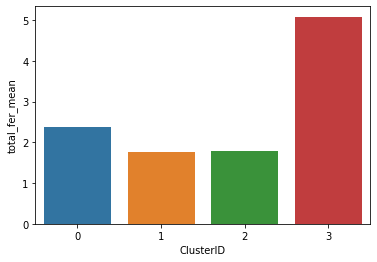

In [106]:
sns.barplot(x=dfa.ClusterID, y=dfa.total_fer_mean)

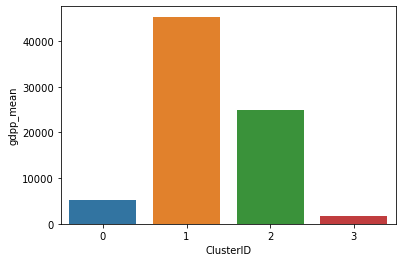

In [107]:
sns.barplot(x=dfa.ClusterID, y=dfa.gdpp_mean)

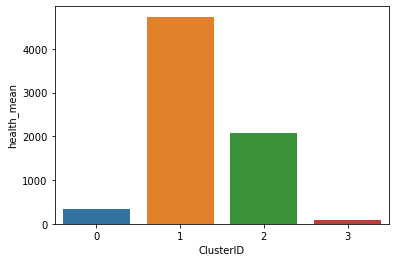

In [108]:
sns.barplot(x=dfa.ClusterID, y=dfa.health_mean)

In [109]:
dk1= df_pca_cluster.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dk1= dk1[dk1['Cluster_Id'] == 0]
dk1['income']= final_df['income']
dk1['gdpp']= final_df['gdpp']
dk1['child_mort']= final_df['child_mort']
dk1['health']= final_df['health']
dk1.head()


,Cluster_Id,country,income,gdpp,child_mort,health
1,0,Albania,9930,4090,16.6,267.895
2,0,Algeria,12900,4460,27.3,185.982
4,0,Antigua and Barbuda,19100,12200,10.3,735.660
5,0,Argentina,18700,10300,14.5,834.300
6,0,Armenia,6700,3220,18.1,141.680


In [110]:
dk1.shape

(76, 6)

In [111]:
dk2= df_pca_cluster.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dk2= dk2[dk2['Cluster_Id'] == 1]
dk2['income']= final_df['income']
dk2['gdpp']= final_df['gdpp']
dk2['child_mort']= final_df['child_mort']
dk2.head()

,Cluster_Id,country,income,gdpp,child_mort
8,1,Austria,43200,46900,4.3
15,1,Belgium,41100,44400,4.5
28,1,Canada,40700,47400,5.6
43,1,Denmark,44000,58000,4.1
52,1,Finland,39800,46200,3.0


In [112]:
dk2.shape

(11, 5)

In [113]:
dk3= df_pca_cluster.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dk3= dk3[dk3['Cluster_Id'] ==2]
dk3['income']= final_df['income']

dk3['gdpp']= final_df['gdpp']
dk3['child_mort']= final_df['child_mort']
dk3['health']= final_df['health']

dk3.head()


,Cluster_Id,country,income,gdpp,child_mort,health
7,2,Australia,41400,51900,4.8,4530.87
10,2,Bahamas,22900,28000,13.8,2209.20
11,2,Bahrain,41100,20700,8.6,1028.79
13,2,Barbados,15300,16000,14.2,1275.20
40,2,Croatia,20100,13500,5.5,1047.60


In [114]:
dk3= dk3.sort_values(by='child_mort', ascending=False)
dk3.head(15)

,Cluster_Id,country,income,gdpp,child_mort,health
122,2,Saudi Arabia,45400,19300,15.7,827.97
125,2,Seychelles,20400,10800,14.4,367.20
13,2,Barbados,15300,16000,14.2,1275.20
10,2,Bahamas,22900,28000,13.8,2209.20
110,2,Oman,45300,19300,11.7,534.61
11,2,Bahrain,41100,20700,8.6,1028.79
127,2,Slovak Republic,25200,16600,7.0,1459.14
108,2,New Zealand,32300,33700,6.2,3403.70
88,2,Lithuania,21100,12000,6.1,844.80
116,2,Poland,21800,12600,6.0,939.96


In [115]:
dk3= dk3.sort_values(by='income', ascending=True)
dk3.head(15)

,Cluster_Id,country,income,gdpp,child_mort,health
13,2,Barbados,15300,16000,14.2,1275.20
40,2,Croatia,20100,13500,5.5,1047.60
125,2,Seychelles,20400,10800,14.4,367.20
88,2,Lithuania,21100,12000,6.1,844.80
116,2,Poland,21800,12600,6.0,939.96
66,2,Hungary,22300,13100,6.0,960.23
50,2,Estonia,22700,14600,4.5,880.38
10,2,Bahamas,22900,28000,13.8,2209.20
127,2,Slovak Republic,25200,16600,7.0,1459.14
117,2,Portugal,27200,22500,3.9,2475.00


In [116]:
dk3= dk3.sort_values(by='health', ascending=True)
dk3.head(15)

,Cluster_Id,country,income,gdpp,child_mort,health
125,2,Seychelles,20400,10800,14.4,367.20
110,2,Oman,45300,19300,11.7,534.61
122,2,Saudi Arabia,45400,19300,15.7,827.97
88,2,Lithuania,21100,12000,6.1,844.80
50,2,Estonia,22700,14600,4.5,880.38
116,2,Poland,21800,12600,6.0,939.96
66,2,Hungary,22300,13100,6.0,960.23
11,2,Bahrain,41100,20700,8.6,1028.79
40,2,Croatia,20100,13500,5.5,1047.60
13,2,Barbados,15300,16000,14.2,1275.20


In [117]:
dk3.shape

(26, 6)

In [118]:
dk4= df_pca_cluster.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dk4= dk4[dk4['Cluster_Id'] == 3]
dk4['income']= final_df['income']
dk4['gdpp']= final_df['gdpp']
dk4['child_mort']= final_df['child_mort']
dk4.head()

,Cluster_Id,country,income,gdpp,child_mort
0,3,Afghanistan,1610,553,90.2
3,3,Angola,5900,3530,119.0
17,3,Benin,1820,758,111.0
24,3,Burkina Faso,1430,575,116.0
25,3,Burundi,764,231,93.6


In [119]:
dk4.shape

(44, 5)

### Inferences:

#### Cluster 4 with Cluster_Id:3 has on an average highest income, highest gdpp, lowest child_mort, highest spenditure on health, lowest inflation. 
#### Then Cluster 1 with Cluster_Id:0. These are the clusters of the developed countries. Cluster 2 with Cluster_Id:1 includes developing countries. & Cluster3 with Id:2 includes under developed countries.

### As its evident that in k-means clustering with k=4 clusters have been formed properly having similar socio-economic and health conditions.

#### Cluster 3 with Cluster_Id : 2  has on an average very  low income,very low gdpp, low health spenditure  with life_expec comaparatively low,  very high total_fer,  high inflation  and high child_mort. 






#### Thus as listed above,  bottom 20 countries of Cluster 3 with Cluster_ Id: 2  could be focused on.

#### Congo, Dem. Rep., Niger , Burundi, Liberia, Sierra Leone ,Central African Republic, Mozambique,  Haiti &  Guinea-Bissau , Chad, Eritrea  etc. with respect to very low income, low gdpp, very high child_mort and less spenditure on health could be the best choice for  Help NGO to provide aid.

#### Congo, Dem. Rep, ., Liberia, Burundi, Niger , Central African Republic have very low income.

#### Haiti , Sierra Leone, Niger, Chad, Central African Republic etc. have very high child_mort.

#### Eritrea, Madagascar,  Niger , Central African Republic, Mozambique, Congo, Dem. Rep, etc. have very low spenditure on health.

### Thus the under developed countries like Congo, Dem. Rep., Niger , Central African Republic, Haiti , Sierra Leone,Mozambique, Liberia, Burundi, Eritrea, Madagascar etc. could be the best choice for  Help NGO to provide aid.




##  Hierarchical Clustering with k=4

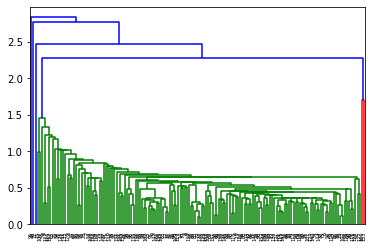

In [91]:
#Let's try hierarchical clustering to see if it works well
#First we'll try the single linkage procedure

mergings_s = linkage(df1, method = "single", metric='euclidean')
dendrogram(mergings_s)
plt.show()


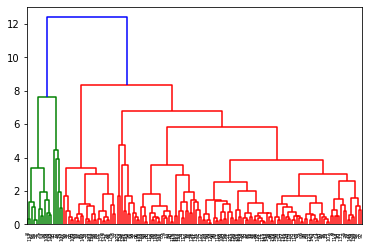

In [92]:
mergings = linkage(df1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### complete linkage gives better dendrogram and clusters.

In [93]:
final_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Cluster_Id', 'country', 'child_mort',
       'exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp'],
      dtype='object')

In [94]:
drop_clus = final_df.drop(["Cluster_Id"] ,axis=1, inplace = True)
drop_clus

In [95]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
hc = pd.concat([final_df, clusterCut], axis=1)
hc.columns = ['PC1', 'PC2', 'PC3','PC4','Country', 'child_mort', 'exports',
     'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',
     'gdpp','ClusterID']


In [96]:
hc.head()

,PC1,PC2,PC3,PC4,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,-2.787815,1.445550,-0.144171,-0.124123,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,-0.036685,-1.531550,-0.389670,0.100797,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,-0.526434,-0.967650,1.166996,-0.037223,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,-2.816842,2.001465,1.602102,-0.150577,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,1.097652,-0.800706,-0.546978,0.190385,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


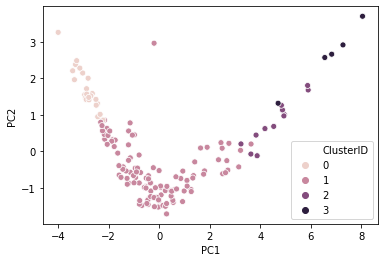

In [97]:
sns.scatterplot(x= 'PC1', y='PC2', hue='ClusterID', legend= 'full', data= hc)

In [98]:
dh1= hc.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dh1= dh1[dh1['ClusterID'] == 0]
dh1.head(25)

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,0
24,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0
25,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0
27,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,0
30,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0
31,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,0
36,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0
39,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220,0


In [99]:
dh1.shape

(25, 11)

In [100]:
dh2= hc.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dh2= dh2[dh2['ClusterID'] == 1]
dh2.head()

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,1


In [101]:
dh2.shape

(115, 11)

In [102]:
dh3= hc.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dh3= dh3[dh3['ClusterID'] == 2]
dh3.head()

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,2
28,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,2
52,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,2
53,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,2


In [103]:
dh3.shape

(12, 11)

In [104]:
dh4= hc.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dh4= dh4[dh4['ClusterID'] == 3]
dh4.head()

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,3
43,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,3
72,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,3
95,Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100,3
107,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300,3


In [105]:
dh4.shape

(5, 11)

In [106]:
km_clusters_exports = pd.DataFrame(hc.groupby(["ClusterID"]).exports.mean())
km_clusters_child_mort = pd.DataFrame(hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_health = pd.DataFrame(hc.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(hc.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(hc.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(hc.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(hc.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(hc.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(hc.groupby(["ClusterID"]).gdpp.mean())
dfa1= pd.concat([pd.Series([0,1,2,3]), km_clusters_exports, km_clusters_child_mort, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
dfa1.columns = ["ClusterID", "exports2", "child_mort2", "health2","imports2","income2","inflation2","life_expec2","total_fer2","gdpp2"]
dfa1.head()

,ClusterID,exports2,child_mort2,health2,imports2,income2,inflation2,life_expec2,total_fer2,gdpp2
0,0,261.684288,112.076000,46.285040,340.107600,1723.720000,8.226600,55.800000,5.516000,773.920000
1,1,3359.401307,28.915652,511.357897,3429.369496,12837.565217,7.892696,71.606087,2.626609,7457.704348
2,2,14824.433333,4.191667,4383.787500,14059.058333,38716.666667,1.436833,81.208333,1.784167,43475.000000
3,3,36374.320000,4.820000,4729.836000,33013.020000,40920.000000,1.311600,80.180000,1.786000,44500.000000


<Figure size 1080x1080 with 0 Axes>

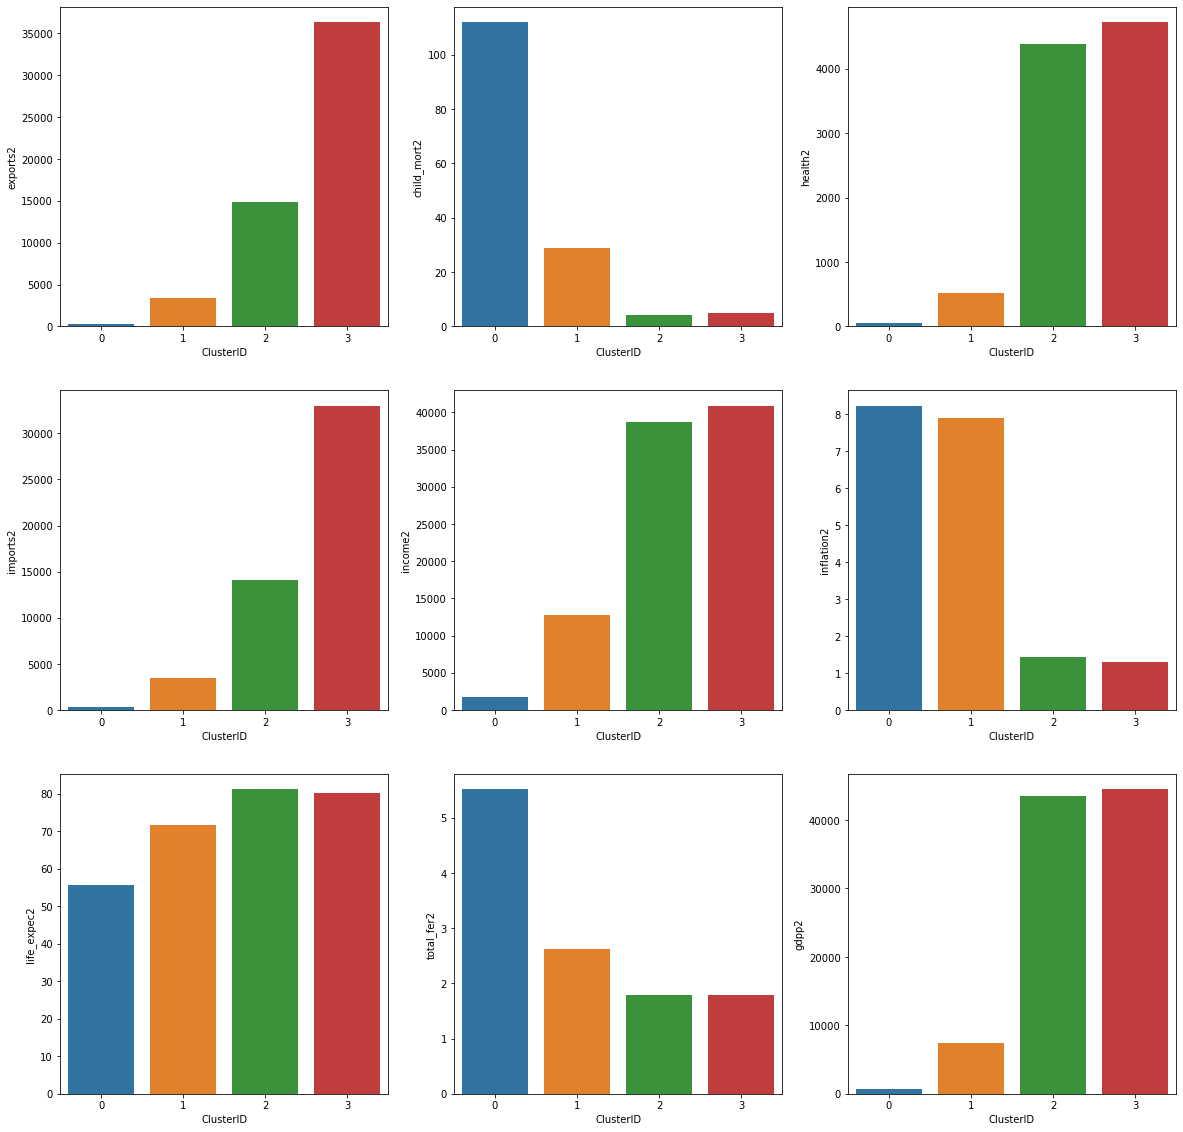

<Figure size 1080x1080 with 0 Axes>

In [107]:
plt.figure(figsize=(20,20))
plt.figure(1)
plt.subplot(331)
sns.barplot(x=dfa1.ClusterID,y=dfa1.exports2)
plt.subplot(332)
sns.barplot(x=dfa1.ClusterID,y=dfa1.child_mort2)
plt.subplot(333)
sns.barplot(x=dfa1.ClusterID,y=dfa1.health2)
plt.subplot(334)
sns.barplot(x=dfa1.ClusterID,y=dfa1.imports2)
plt.subplot(335)
sns.barplot(x=dfa1.ClusterID,y=dfa1.income2)
plt.subplot(336)
sns.barplot(x=dfa1.ClusterID,y=dfa1.inflation2)
plt.subplot(337)
sns.barplot(x=dfa1.ClusterID,y=dfa1.life_expec2)
plt.subplot(338)
sns.barplot(x=dfa1.ClusterID,y=dfa1.total_fer2)
plt.subplot(339)
sns.barplot(x=dfa1.ClusterID,y=dfa1.gdpp2)
plt.figure(figsize=(15,15))


#### Checking the Loadings : How PC1 & PC2 related with different countries

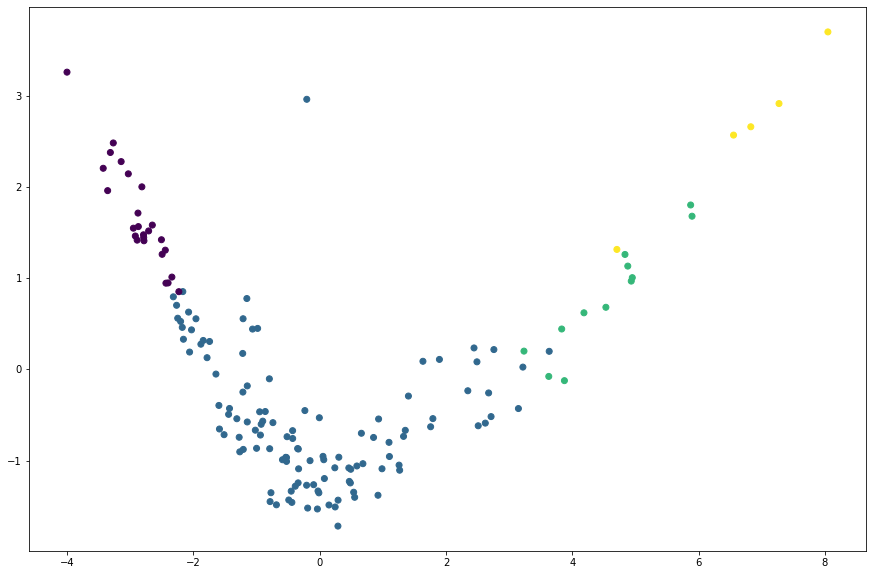

In [108]:
plt.figure(figsize=(15,10))
plt.scatter(hc.PC1,hc.PC2,c=hc.ClusterID)

#### In Hierarchical Clustering with k=4,  its evident that clustering is not done well as the clusters with similar socio economic & health factors are not exactly  falling under same cluster as compare to k-means clustering.

#### Cluster2  with Id:1  contains 115 countries which has a wide range of income, gdpp, health, inflation falling under same cluster.

#### Though can still be a good choice. In case of hierarchical clustering with k=4, as listed above, Cluster 1 with Cluster_id: 0 includes set of under developed countries with very low income & gdpp, low health & very high child_mort.  

#### The under developed countries like Congo, Dem. Rep., Niger , Central African Republic, Haiti , Sierra Leone,Mozambique, Liberia, Burundi etc. could be the best choice for  Help NGO to provide aid.




## Hierarchical Clustering with k=5

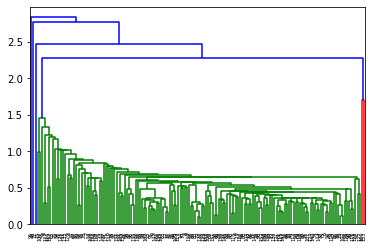

In [109]:
#Let's try hierarchical clustering to see if it works well
#First we'll try the single linkage procedure

mergings = linkage(df1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()


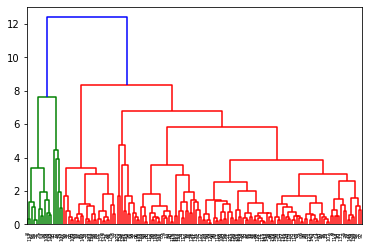

In [110]:
mergings = linkage(df1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### Complete linkage gives better dendrogram and clusters.

In [111]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
hc1 = pd.concat([final_df, clusterCut], axis=1)
hc1.columns = ['PC1', 'PC2', 'PC3','PC4','Country', 'child_mort', 'exports',
     'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',
     'gdpp','ClusterID']
hc1.head()

,PC1,PC2,PC3,PC4,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,-2.787815,1.445550,-0.144171,-0.124123,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,-0.036685,-1.531550,-0.389670,0.100797,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,-0.526434,-0.967650,1.166996,-0.037223,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,-2.816842,2.001465,1.602102,-0.150577,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,1.097652,-0.800706,-0.546978,0.190385,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


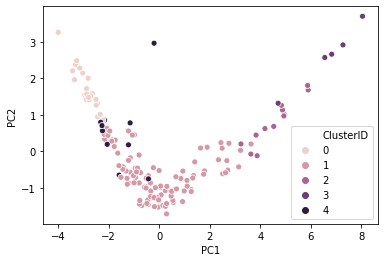

In [112]:
sns.scatterplot(x= 'PC1', y='PC2', hue='ClusterID', legend= 'full', data= hc1)

In [113]:
km_clusters_exports = pd.DataFrame(hc1.groupby(["ClusterID"]).exports.mean())
km_clusters_child_mort = pd.DataFrame(hc1.groupby(["ClusterID"]).child_mort.mean())
km_clusters_health = pd.DataFrame(hc1.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(hc1.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(hc1.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(hc1.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(hc1.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(hc1.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(hc1.groupby(["ClusterID"]).gdpp.mean())
dfa1= pd.concat([pd.Series([0,1,2,3,4]), km_clusters_exports, km_clusters_child_mort, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
dfa1.columns = ["ClusterID", "exports2", "child_mort2", "health2","imports2","income2","inflation2","life_expec2","total_fer2","gdpp2"]
dfa1.head()

,ClusterID,exports2,child_mort2,health2,imports2,income2,inflation2,life_expec2,total_fer2,gdpp2
0,0,261.684288,112.076000,46.285040,340.107600,1723.720000,8.226600,55.800000,5.516000,773.920000
1,1,3419.828849,25.374038,537.211039,3583.637712,13163.846154,6.140000,72.176923,2.433846,7687.461538
2,2,14824.433333,4.191667,4383.787500,14059.058333,38716.666667,1.436833,81.208333,1.784167,43475.000000
3,3,36374.320000,4.820000,4729.836000,33013.020000,40920.000000,1.311600,80.180000,1.786000,44500.000000
4,4,2788.086364,62.400000,266.928182,1970.833636,9752.727273,24.463636,66.209091,4.449091,5285.454545


<Figure size 1080x1080 with 0 Axes>

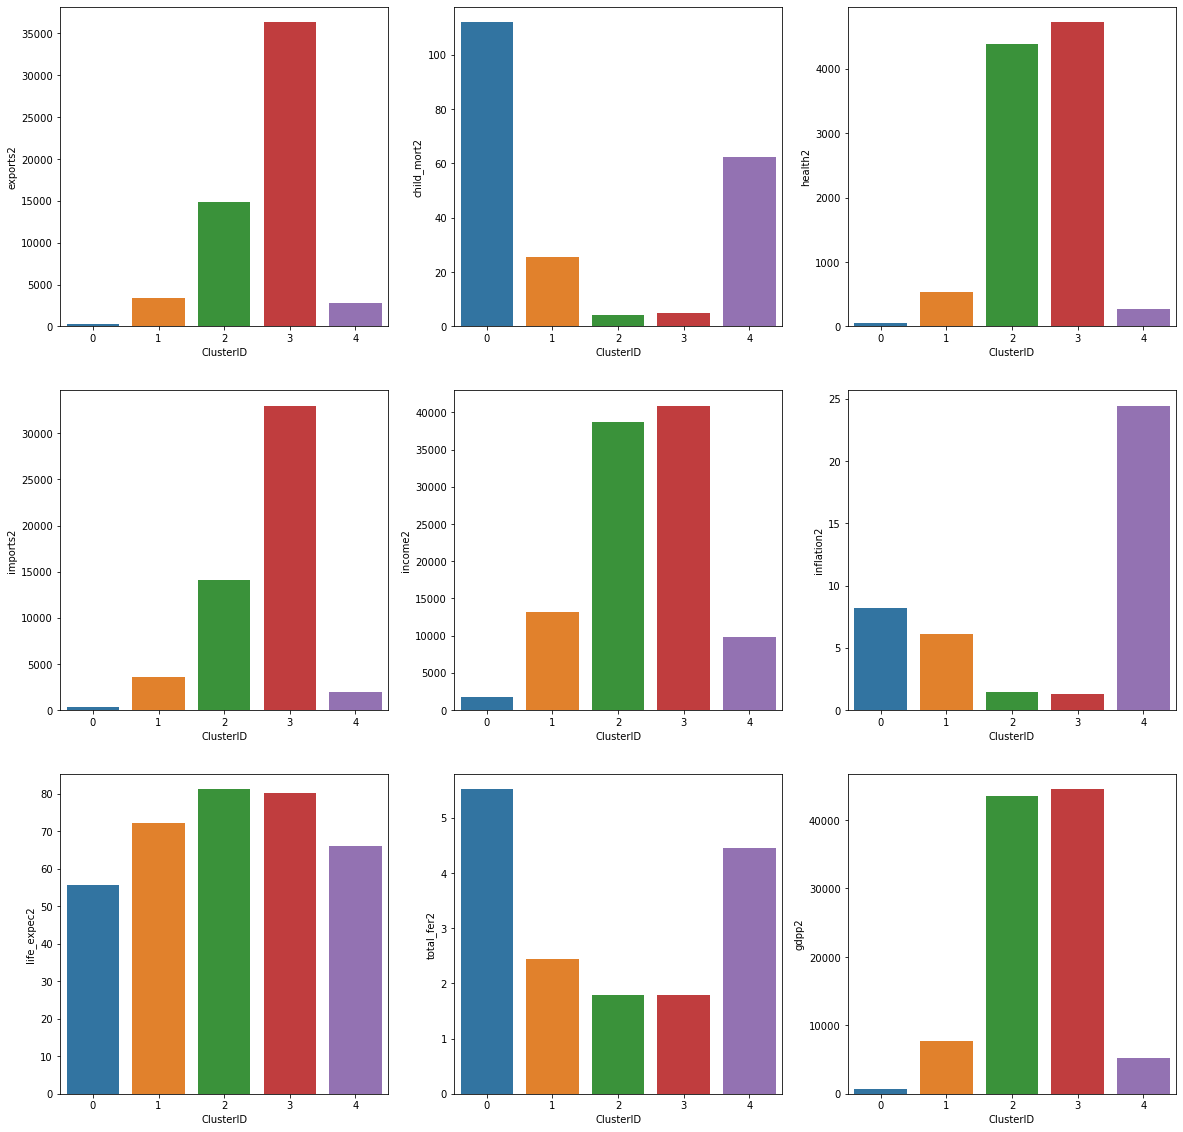

<Figure size 1080x1080 with 0 Axes>

In [114]:
plt.figure(figsize=(20,20))
plt.figure(1)
plt.subplot(331)
sns.barplot(x=dfa1.ClusterID,y=dfa1.exports2)
plt.subplot(332)
sns.barplot(x=dfa1.ClusterID,y=dfa1.child_mort2)
plt.subplot(333)
sns.barplot(x=dfa1.ClusterID,y=dfa1.health2)
plt.subplot(334)
sns.barplot(x=dfa1.ClusterID,y=dfa1.imports2)
plt.subplot(335)
sns.barplot(x=dfa1.ClusterID,y=dfa1.income2)
plt.subplot(336)
sns.barplot(x=dfa1.ClusterID,y=dfa1.inflation2)
plt.subplot(337)
sns.barplot(x=dfa1.ClusterID,y=dfa1.life_expec2)
plt.subplot(338)
sns.barplot(x=dfa1.ClusterID,y=dfa1.total_fer2)
plt.subplot(339)
sns.barplot(x=dfa1.ClusterID,y=dfa1.gdpp2)
plt.figure(figsize=(15,15))

In [115]:
dh1= hc1.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dh1= dh1[dh1['ClusterID'] == 0]
dh1.head(25)

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,0
24,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0
25,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0
27,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,0
30,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0
31,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,0
36,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0
39,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220,0


In [116]:
dh1.shape

(25, 11)

In [117]:
dh2= hc1.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dh2= dh2[dh2['ClusterID'] == 1]
dh2.head()

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,1


In [118]:
dh2.shape

(104, 11)

In [119]:
dh3= hc1.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dh3= dh3[dh3['ClusterID'] == 2]
dh3.head(15)

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,2
28,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,2
52,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,2
53,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,2
57,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,2
67,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,2
74,Italy,4.0,9021.6,3411.74,9737.6,36200,0.319,81.7,1.46,35800,2
76,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.900,82.8,1.39,44500,2
108,New Zealand,6.2,10211.1,3403.70,9436.0,32300,3.730,80.9,2.17,33700,2


In [120]:
dh3.shape

(12, 11)

In [121]:
dh4= hc1.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dh4= dh4[dh4['ClusterID'] == 3]
dh4.head()

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,3
43,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,3
72,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,3
95,Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100,3
107,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300,3


In [122]:
dh4.shape

(5, 11)

In [123]:
dh5= hc1.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1)
dh5= dh5[dh5['ClusterID'] == 4]
dh5.head(15)

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
37,"Congo, Rep.",63.9,2331.74,67.404,1498.78,5190,20.7,60.4,4.95,2740,4
48,Equatorial Guinea,111.0,14671.80,766.080,10071.90,33700,24.9,60.9,5.21,17100,4
54,Gabon,63.7,5048.75,306.250,1653.75,15400,16.6,62.9,4.08,8750,4
58,Ghana,74.7,386.45,68.382,601.29,3060,16.6,62.2,4.27,1310,4
71,Iraq,36.9,1773.00,378.450,1534.50,12700,16.6,67.2,4.56,4500,4
96,Mauritania,97.4,608.40,52.920,734.40,3320,18.9,68.2,4.98,1200,4
100,Mongolia,26.1,1237.55,144.160,1502.55,7710,39.2,66.2,2.64,2650,4
135,Sudan,76.7,291.56,93.536,254.56,3370,19.6,66.3,4.88,1480,4
141,Timor-Leste,62.6,79.20,328.320,1000.80,1850,26.5,71.1,6.23,3600,4
153,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.9,75.4,2.47,13500,4


In [124]:
dh5.shape

(11, 11)





#### Also its evident from Scatterplot that Hierarchical clustering with k=5 is not done properly  as compare to hierarchical clustering with k=4 & k-means clustering with k=4.

#### Though cluster 1 with cluster id 0 could be considered as best choice for Help NGO to provide aid as listed above if hierarchical clustering is chosen. 











## Conclusions:

### K-means clustering is giving better clusters with k=4  with similar figures of socio-economic & health factors of different countries.

### Thus the under developed countries like Congo, Dem. Rep., Niger , Central African Republic, Haiti , Sierra Leone, Mozambique, Liberia, Burundi, Eritrea, Madagascar  etc. could be the best choice for  Help NGO to provide aid as these countries have very low income ,very low gdpp with very high child_mort & very low spenditure on health. 
 

